In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset/train.csv")

In [3]:
df

image_link  group_id  \
0       https://m.media-amazon.com/images/I/61I9XdN6OF...    748919   
1       https://m.media-amazon.com/images/I/71gSRbyXmo...    916768   
2       https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516   
3       https://m.media-amazon.com/images/I/612mrlqiI4...    459516   
4       https://m.media-amazon.com/images/I/617Tl40LOX...    731432   
...                                                   ...       ...   
263854  https://m.media-amazon.com/images/I/612J1R1xHl...    558806   
263855  https://m.media-amazon.com/images/I/61Blzh2+28...    470067   
263856  https://m.media-amazon.com/images/I/51MsegDL9V...    204245   
263857  https://m.media-amazon.com/images/I/510KhVw4VS...    752266   
263858  https://m.media-amazon.com/images/I/51lzTNLQ-6...    416664   

        entity_name     entity_value  
0       item_weight       500.0 gram  
1       item_volume          1.0 cup  
2       item_weight       0.709 gram  
3       item_weight       0.709 gram  
4       item_weight   1400 milligram  
...             ...              ...  
263854       height   5.0 centimetre  
263855       height         8.5 inch  
263856       height  43.2 centimetre  
263857       height   9.1 centimetre  
263858       height  27.5 centimetre  

[263859 rows x 4 columns]

In [4]:
# %pip install transformers einops

In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image

model_id = "vikhyatk/moondream2"
revision = "2024-08-26"
model = AutoModelForCausalLM.from_pretrained(
    model_id, trust_remote_code=True, revision=revision
)
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)

/Users/nexus/miniconda3/envs/asl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


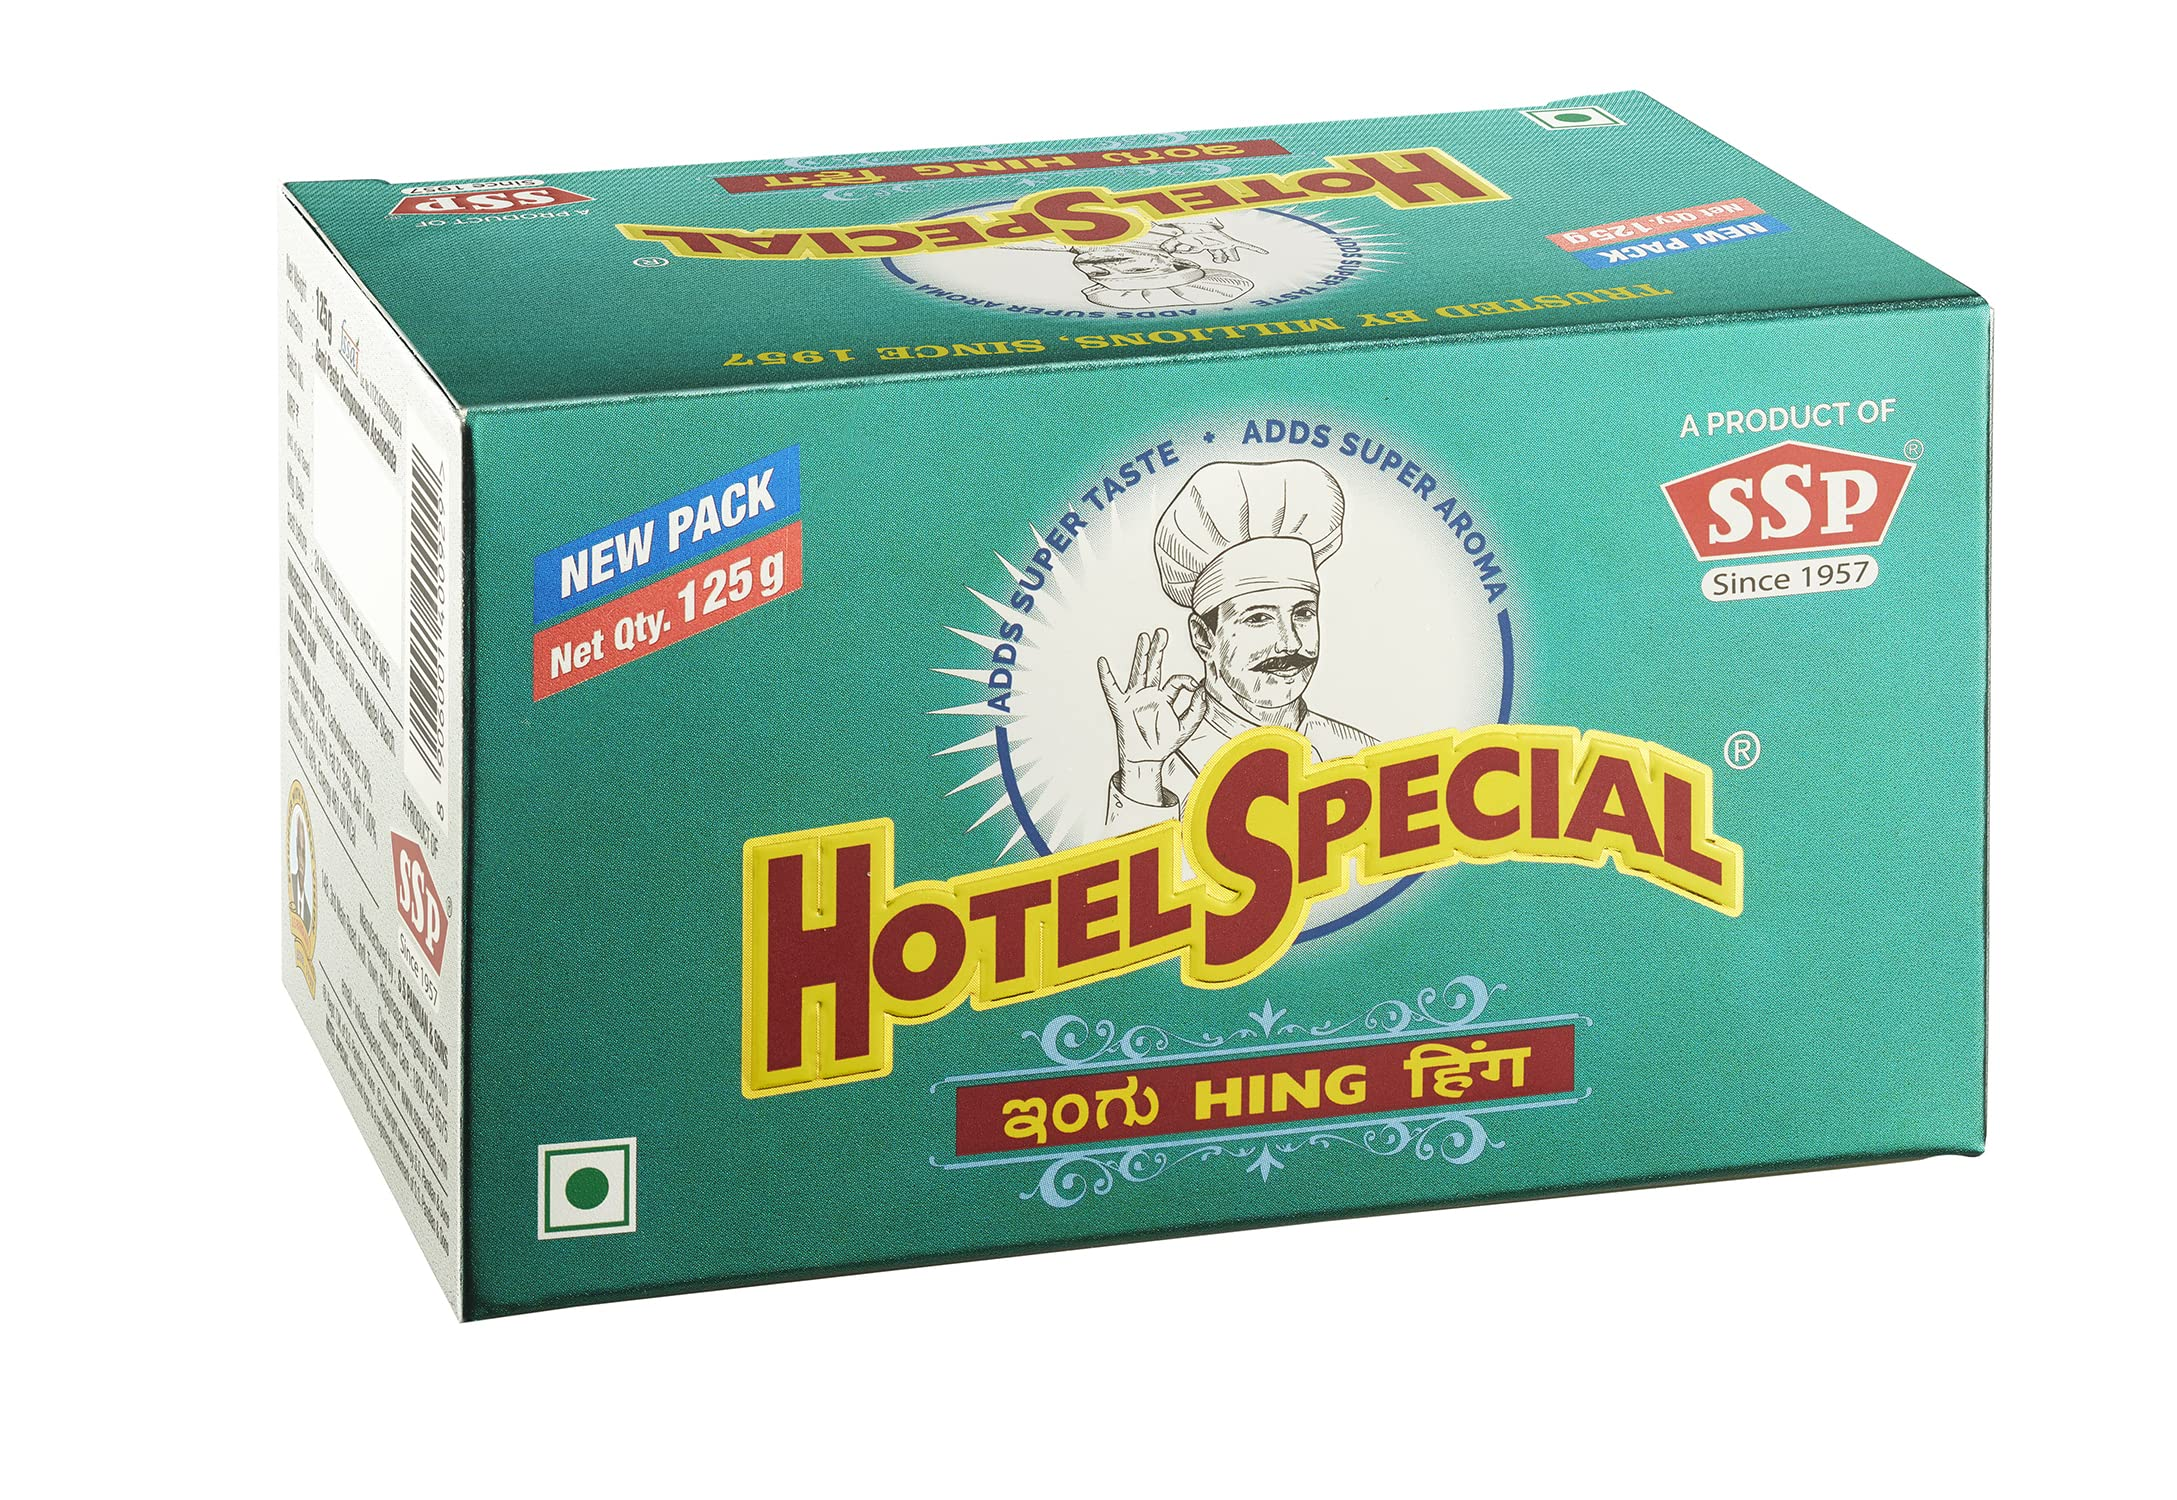

In [6]:
sample = df.sample(1)
img_link = sample.values[0][0]
met = sample.values[0][2]

from src.utils import download_image
save_folder='./dump'
download_image(img_link, save_folder)

import os
from pathlib import Path
filename = Path(img_link).name
image_path = os.path.join(save_folder, filename)

from IPython.display import display
image = Image.open(image_path)
display(image)

In [7]:
print(sample.values[0][3])
print(met)

125 gram
item_weight


In [8]:
from src.constants import entity_unit_map

entity_unit_map[met]

{'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton'}

In [9]:
enc_image = model.encode_image(image)
print(model.answer_question(enc_image, f"Image presented to you has information about the physical properties of the object. Find the {met} of the object from the above Image. Write the metric units in the allowed units {entity_unit_map[met]}", tokenizer))

125g
